# K-Means (On Image Compression)

Quantization, involved in image processing, is a lossy compression technique achieved by compressing a range of values to a single quantum (discrete) value. When the number of discrete symbols in a given stream is reduced, the stream becomes more compressible.

In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img

from sklearn.cluster import KMeans

In [66]:
image_array = img.imread("Doctor Strange 3.jpg") # Reads Image as Array.

In [67]:
image_array

array([[[ 98, 113, 144],
        [ 89, 104, 135],
        [ 86, 101, 134],
        ...,
        [138, 148, 173],
        [153, 160, 179],
        [153, 158, 177]],

       [[ 95, 106, 134],
        [ 93, 106, 138],
        [ 84, 100, 133],
        ...,
        [148, 154, 176],
        [154, 159, 179],
        [150, 155, 174]],

       [[ 97, 108, 138],
        [ 97, 108, 138],
        [ 86, 101, 132],
        ...,
        [150, 156, 178],
        [159, 164, 184],
        [146, 152, 176]],

       ...,

       [[ 96, 126, 164],
        [ 98, 128, 166],
        [100, 127, 170],
        ...,
        [ 95, 121, 158],
        [101, 127, 164],
        [105, 131, 168]],

       [[ 93, 123, 161],
        [ 94, 123, 163],
        [ 95, 127, 168],
        ...,
        [ 91, 116, 157],
        [ 91, 116, 157],
        [101, 126, 167]],

       [[ 92, 120, 160],
        [ 94, 122, 162],
        [ 86, 118, 157],
        ...,
        [ 94, 119, 159],
        [ 86, 111, 152],
        [101, 126, 167]]

In [68]:
image_array.shape

(1080, 1920, 3)

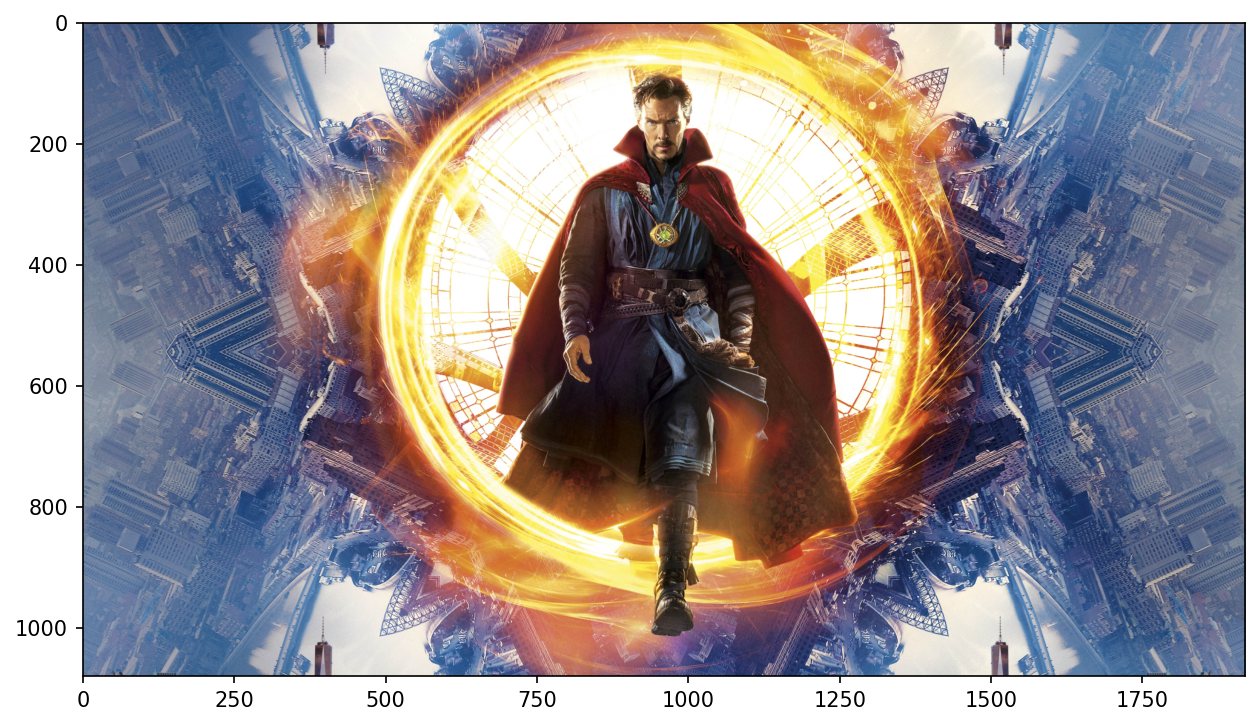

In [69]:
plt.figure(figsize= (10,8), dpi= 150)

plt.imshow(image_array)

plt.show()

### Reshaping Image Array From 3D to 2D for Applying K-Means:

In [70]:
image_array.shape

(1080, 1920, 3)

In [71]:
# This Shape represents (Height, Width, Colours) of Image.

In [72]:
# Reshaping Array from (Height, Width, Colours) (3D) to (Height * Width, Colours) (2D)

In [73]:
(Height, Width, Colours) = image_array.shape

In [74]:
Height

1080

In [75]:
Width

1920

In [76]:
Colours

3

In [77]:
image_array_2d = image_array.reshape(Height * Width, Colours)

In [78]:
image_array_2d

array([[ 98, 113, 144],
       [ 89, 104, 135],
       [ 86, 101, 134],
       ...,
       [ 94, 119, 159],
       [ 86, 111, 152],
       [101, 126, 167]], dtype=uint8)

### Applying K-Means on 2D Array:

In [79]:
kmc = KMeans(n_clusters=5)

In [80]:
clusters = kmc.fit_predict(image_array_2d)

In [81]:
clusters

array([0, 1, 1, ..., 0, 1, 0])

In [82]:
kmc.cluster_centers_

array([[121.80687452, 129.94593572, 155.63264764],
       [ 70.39970775,  87.21217357, 127.03752419],
       [219.9385475 , 159.73014631,  82.98595995],
       [ 72.49948108,  41.93383622,  40.20171255],
       [244.39983531, 240.13237798, 222.4359652 ]])

In [83]:
# Rounding Up Values of Cluster Centers so they can be used as colour values.

In [84]:
color_codes = np.round(kmc.cluster_centers_, 0)

In [85]:
color_codes

array([[122., 130., 156.],
       [ 70.,  87., 127.],
       [220., 160.,  83.],
       [ 72.,  42.,  40.],
       [244., 240., 222.]])

In [86]:
color_codes = color_codes.astype("int")

In [87]:
# Now, we will Replace Each Row in 2D array by the Value of Cluster Center that Row belongs to:

image_array_2d

array([[ 98, 113, 144],
       [ 89, 104, 135],
       [ 86, 101, 134],
       ...,
       [ 94, 119, 159],
       [ 86, 111, 152],
       [101, 126, 167]], dtype=uint8)

In [88]:
clusters

array([0, 1, 1, ..., 0, 1, 0])

In [89]:
color_codes

array([[122, 130, 156],
       [ 70,  87, 127],
       [220, 160,  83],
       [ 72,  42,  40],
       [244, 240, 222]])

In [90]:
new_image_2d = color_codes[clusters]

In [91]:
new_image_2d

array([[122, 130, 156],
       [ 70,  87, 127],
       [ 70,  87, 127],
       ...,
       [122, 130, 156],
       [ 70,  87, 127],
       [122, 130, 156]])

In [92]:
new_image_3d = new_image_2d.reshape(Height, Width, Colours)

In [93]:
new_image_3d

array([[[122, 130, 156],
        [ 70,  87, 127],
        [ 70,  87, 127],
        ...,
        [122, 130, 156],
        [122, 130, 156],
        [122, 130, 156]],

       [[ 70,  87, 127],
        [ 70,  87, 127],
        [ 70,  87, 127],
        ...,
        [122, 130, 156],
        [122, 130, 156],
        [122, 130, 156]],

       [[ 70,  87, 127],
        [ 70,  87, 127],
        [ 70,  87, 127],
        ...,
        [122, 130, 156],
        [122, 130, 156],
        [122, 130, 156]],

       ...,

       [[122, 130, 156],
        [122, 130, 156],
        [122, 130, 156],
        ...,
        [122, 130, 156],
        [122, 130, 156],
        [122, 130, 156]],

       [[122, 130, 156],
        [122, 130, 156],
        [122, 130, 156],
        ...,
        [122, 130, 156],
        [122, 130, 156],
        [122, 130, 156]],

       [[122, 130, 156],
        [122, 130, 156],
        [122, 130, 156],
        ...,
        [122, 130, 156],
        [ 70,  87, 127],
        [122, 130, 156]]

In [94]:
new_image_3d.shape

(1080, 1920, 3)

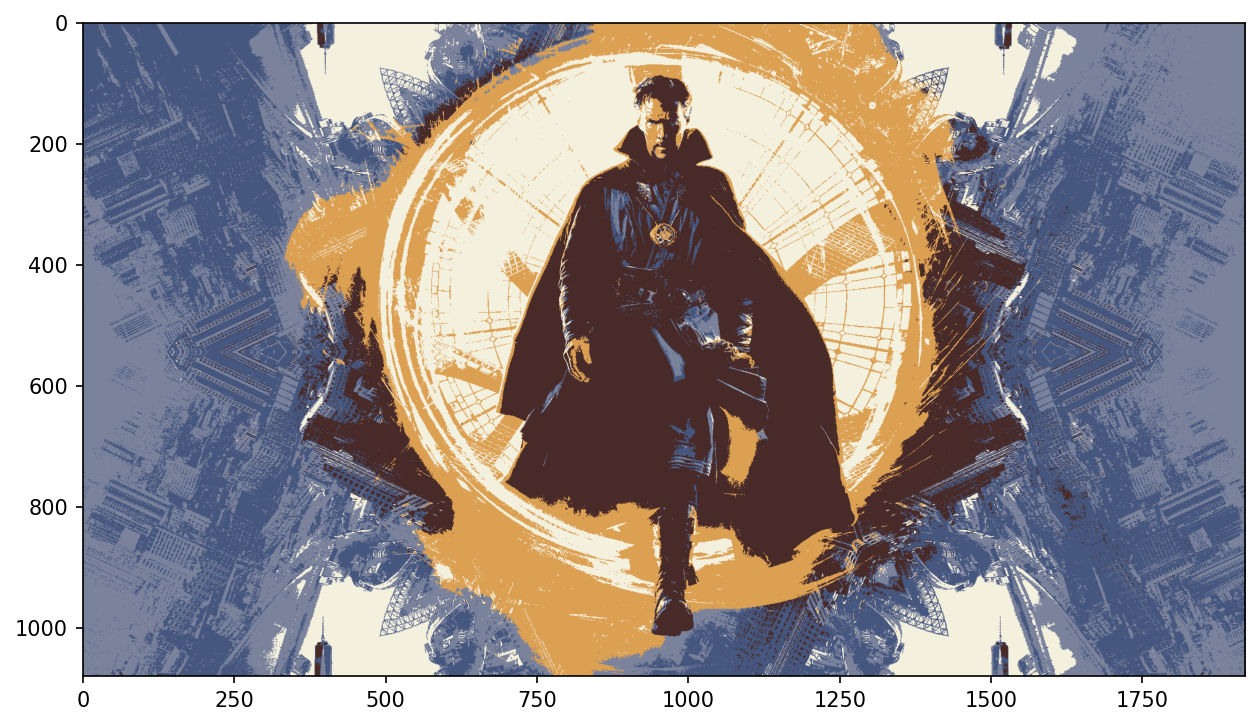

In [95]:
plt.figure(figsize= (10,8), dpi= 150)

plt.imshow(new_image_3d)

plt.show()

In [97]:
plt.imsave("Doctor Strange Compressed.jpg", new_image_3d.astype("uint8"))